# Chapter 2

Example used in second part of chapter is called the globe tossing experiment. The goal is to estimate the proportion of Earth's surface that's covered in water. We toss the globe high up into the air and make it spin rapidly, so that when we catch it it's orientation does not depend at all on it's previous orientation. We mark 'W' if our index finger lands on water, or 'L' if it marks land. We observe the sequence W L W W W L W L W.

We choose the binomial distribution to be our likelihood function
$$ Pr(w|n,p) = \frac{n!}{w!(n-w)!}p^w(1-p)^{n-w} $$
where $w$ is the number of 'W' observations in $n$ throws, occurring with probability $p$.

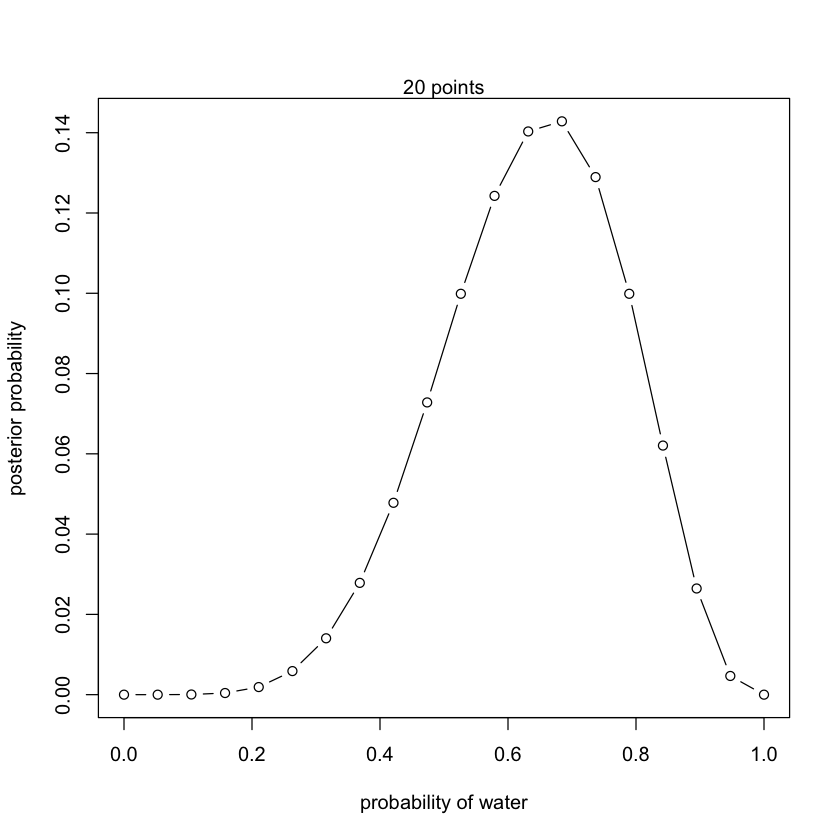

In [14]:
## Page 40

# define grid
p_grid <- seq( from=0, to=1, length.out=20 )

# define prior
prior <- rep( 1, 20 )

# compute likelihood at each value in grid
likelihood <- dbinom( 6, size=9, prob=p_grid )

# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum( unstd.posterior )

# plot posterior distribution
plot( p_grid, posterior, type='b',
      xlab='probability of water',
      ylab='posterior probability' )
mtext( '20 points' )

## Apply a Quadratic approximation to the globe tossing problem

As the number of parameters increases, the grid-approximation we used above becomes untenable. One way to get around this problem is to use quadratic approximation (page 41).

In [19]:
## Page 42

library(rethinking)
globe.qa <- map(
    alist(
        w ~ dbinom(9,p), # binomial likelihood
        p ~ dunif(0,1)  # uniform prior
    ),
    data=list(w=6) )

# display summary of quadratic approximation
precis( globe.qa )

,mean,sd,5.5%,94.5%
p,0.6666667,0.1571338,0.4155366,0.9177968


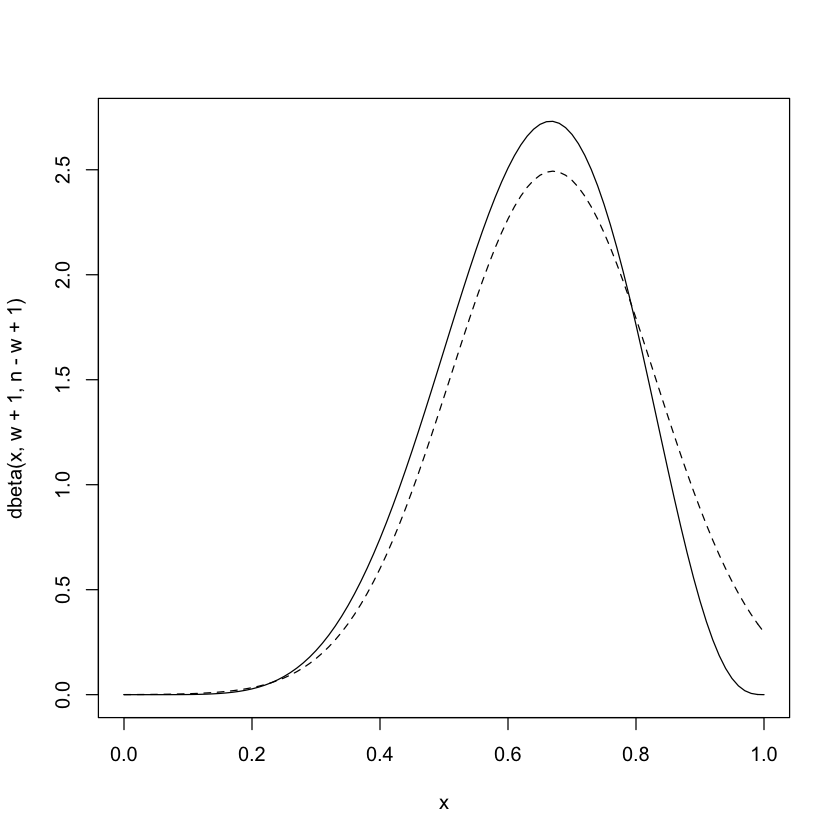

In [40]:
## Page 43
# Compare quadratic approximation to real answer
w <- 6 # number of tosses that land on water
n <- 9 # number of tosses
curve( dbeta( x, w+1, n-w+1), from=0, to=1 )
# quadratic approximation
curve( dnorm( x, 0.67, 0.16 ), lty=2, add=TRUE )